### Import and Format MNIST Dataset

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from PIL import Image

In [4]:
import matplotlib.gridspec as gridspec

In [5]:
from tensorflow.keras.datasets.mnist import load_data

In [6]:
# Load data
(x_train, y_train), (x_test, y_test) = load_data()

In [7]:
# Reshape
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

In [8]:
# Normalize data
x_train = x_train/255
x_test  = x_test/255

### Train Neural Network

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [10]:
nn_model = Sequential()

In [11]:
nn_model.add(Dense(16, input_shape=x_train[0].shape, activation='relu'))
nn_model.add(Dense(16,  activation='relu'))
nn_model.add(Flatten())
nn_model.add(Dense(10,  activation='softmax'))

In [12]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 28, 16)        32        
_________________________________________________________________
dense_1 (Dense)              (None, 28, 28, 16)        272       
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                125450    
Total params: 125,754
Trainable params: 125,754
Non-trainable params: 0
_________________________________________________________________


In [13]:
nn_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

nn_model.fit(x=x_train,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 294us/sample - loss: 0.3515 - accuracy: 0.9003
Epoch 2/10
60000/60000 [==============================] - 24s 406us/sample - loss: 0.2845 - accuracy: 0.9194
Epoch 3/10
60000/60000 [==============================] - 17s 275us/sample - loss: 0.2699 - accuracy: 0.9240
Epoch 4/10
60000/60000 [==============================] - 17s 275us/sample - loss: 0.2577 - accuracy: 0.9269
Epoch 5/10
60000/60000 [==============================] - 17s 280us/sample - loss: 0.2432 - accuracy: 0.9315
Epoch 6/10
60000/60000 [==============================] - 16s 274us/sample - loss: 0.2317 - accuracy: 0.9349
Epoch 7/10
60000/60000 [==============================] - 17s 275us/sample - loss: 0.2177 - accuracy: 0.9392
Epoch 8/10
60000/60000 [==============================] - 17s 276us/sample - loss: 0.2074 - accuracy: 0.9412
Epoch 9/10
60000/60000 [==============================] - 17s 279us/sample - loss: 0.1992 - accuracy: 0.9

### Train Convolutional Neural Network

In [14]:
cnn_model = Sequential()

In [15]:
cnn_model.add(Conv2D(28, kernel_size=(3,3), input_shape=x_train[0].shape))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(10,activation='softmax'))

In [16]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [17]:
cnn_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

cnn_model.fit(x=x_train,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 39s 657us/sample - loss: 0.2217 - accuracy: 0.9331
Epoch 2/10
60000/60000 [==============================] - 38s 626us/sample - loss: 0.0881 - accuracy: 0.9729
Epoch 3/10
60000/60000 [==============================] - 38s 628us/sample - loss: 0.0625 - accuracy: 0.9804
Epoch 4/10
60000/60000 [==============================] - 38s 631us/sample - loss: 0.0471 - accuracy: 0.9850
Epoch 5/10
60000/60000 [==============================] - 38s 632us/sample - loss: 0.0369 - accuracy: 0.9877
Epoch 6/10
60000/60000 [==============================] - 38s 636us/sample - loss: 0.0312 - accuracy: 0.9895
Epoch 7/10
60000/60000 [==============================] - 39s 642us/sample - loss: 0.0254 - accuracy: 0.9913- loss: 0.0254 - accuracy
Epoch 8/10
60000/60000 [==============================] - 39s 652us/sample - loss: 0.0223 - accuracy: 0.9921
Epoch 9/10
60000/60000 [==============================] - 41s 688us/sample - los

### Train K-Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [20]:
knn_model.fit(x_train.reshape(len(x_train), 784), y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Evaluate the Models on the Training Set

In [21]:
print('NN Model Accuracy: ' , nn_model.evaluate(x_test, y_test, verbose=False)[1])

NN Model Accuracy:  0.9346


In [22]:
print('CNN Model Accuracy: ', cnn_model.evaluate(x_test, y_test, verbose=False)[1])

CNN Model Accuracy:  0.9835


In [23]:
print('KNN Model Accuracy: ', knn_model.score(x_test[:1000].reshape(len(x_test[:1000]), 784), y_test[:1000]))

KNN Model Accuracy:  0.961


### Visualize Predictions

In [72]:
def plot_fig(y, filename, filepath):
    
    # Load Image
    img = (np.invert(Image.open(filepath + filename).convert('L')))/255
    
    # Calculate Prediction probabilities for each NN model
    nn_pred = nn_model.predict(img.reshape(1, 28, 28, 1))[0]
    cnn_pred = cnn_model.predict(img.reshape(1, 28, 28, 1))[0]
    
    # Caclulate 5 Nearest Neighbors for KNN
    nbr_index = knn_model.kneighbors(img.reshape(1, 784), n_neighbors=5, return_distance=False)[0]
    nbr_label = y_train[nbr_index]
    knn_pred = np.bincount(nbr_label, minlength=10)/len(nbr_label)
    
    # Plot Image
    fig = plt.figure()

    plt.subplot2grid((3,2), (0,0), rowspan=3)
    plt.imshow(img.reshape(28, 28), vmin=0, vmax=1, cmap='Greys')
    plt.xticks([])
    plt.yticks([])

    # Plot NN Prediction
    plt.subplot2grid((3,2), (0, 1))
    plt.bar(list(range(len(nn_pred))), nn_pred, color='lightblue')
    plt.bar([y], np.array(nn_pred[y])[nn_pred.argmax() == y], color='tab:blue')
    plt.xticks(np.arange(0, 10))
    plt.ylim([0, 1])
    plt.title('NN')
    plt.yticks([0, .5, 1])

    # Plot CNN Prediction
    plt.subplot2grid((3,2), (1, 1))
    plt.bar(list(range(len(cnn_pred))), cnn_pred, color='lightgreen')
    plt.bar([y], np.array(cnn_pred[y])[cnn_pred.argmax() == y], color='tab:green')
    plt.xticks(np.arange(0, 10))
    plt.ylim([0, 1])
    plt.title('CNN')
    plt.yticks([0, .5, 1])

    # Plot KNN Prediction
    plt.subplot2grid((3,2), (2, 1))
    plt.bar(list(range(len(knn_pred))), knn_pred, color='peachpuff')
    plt.bar([y], np.array(knn_pred[y])[knn_pred.argmax() == y], color='tab:red')
    plt.xticks(np.arange(0, 10))
    plt.ylim([0, 1])
    plt.title('KNN')
    plt.yticks([0, .5, 1])

    fig.tight_layout()
    fig.set_size_inches(w=12,h=6)

    fig.savefig(filepath + 'Plots/' + filename.replace('.png', '') + '_plot.png')
    plt.close()

In [28]:
from os import listdir

In [38]:
'zero_00.png'.replace('.png', '')

'zero_00'

In [ ]:
path = 'Images/Zero/'
y = 0

for filename in listdir(path):
    
    if 'png' in filename:
        
        print(filename, end="\r")
        plot_fig(y, filename, path)

In [ ]:
path = 'Images/One/'
y = 1

for filename in listdir(path):
    
    if 'png' in filename:
        
        print(filename, end="\r")
        plot_fig(y, filename, path)

In [73]:
path = 'Images/Two/'
y = 2

for filename in listdir(path):
    
    if 'png' in filename:
        
        print(filename, end="\r")
        plot_fig(y, filename, path)

In [45]:
img = (np.invert(Image.open('Images/Two/two_00.png').convert('L')))/255

In [46]:
nn_pred = nn_model.predict(img.reshape(1, 28, 28, 1))[0]

nn_pred

array([2.6191086e-05, 4.5022633e-05, 9.8589200e-01, 2.4958651e-03,
       4.4336372e-05, 1.9689447e-03, 8.1050443e-04, 3.6777565e-05,
       6.7517175e-03, 1.9287341e-03], dtype=float32)

In [47]:
cnn_pred = cnn_model.predict(img.reshape(1, 28, 28, 1))[0]

cnn_pred

array([8.8701961e-14, 3.4627260e-07, 9.9999332e-01, 6.2626482e-06,
       8.5127894e-12, 6.0886658e-13, 8.2619800e-16, 1.6827196e-08,
       9.3741983e-09, 7.4218404e-13], dtype=float32)

In [48]:
nbr_index = knn_model.kneighbors(img.reshape(1, 784), n_neighbors=5, return_distance=False)[0]
nbr_label = y_train[nbr_index]
knn_pred = np.bincount(nbr_label, minlength=10)/len(nbr_label)

knn_pred

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

(-0.5, 27.5, 27.5, -0.5)

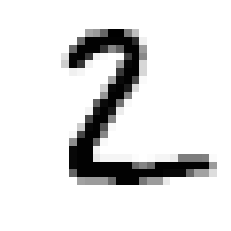

In [70]:
plt.imshow(x_test[1].reshape(28, 28), cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.axis('off')